# Linear Regression

In [111]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

TASK 1

In [246]:
X,Y=make_regression(n_samples=100,n_features=1,random_state=0,noise=4.0,bias=100.0)

In [24]:
df=pd.read_csv('communities.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [31]:
df=df.replace('?',np.nan)

In [32]:
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [55]:
con=open('communities.txt','r').read()

In [74]:
con1=con.split('\n-- ')

In [75]:
header=[]
for c in con1:
    header.append(c.split(': ')[0])

In [76]:
print(header[1:])

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [77]:
df.columns=header[1:]

In [78]:
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


TASK 1.1

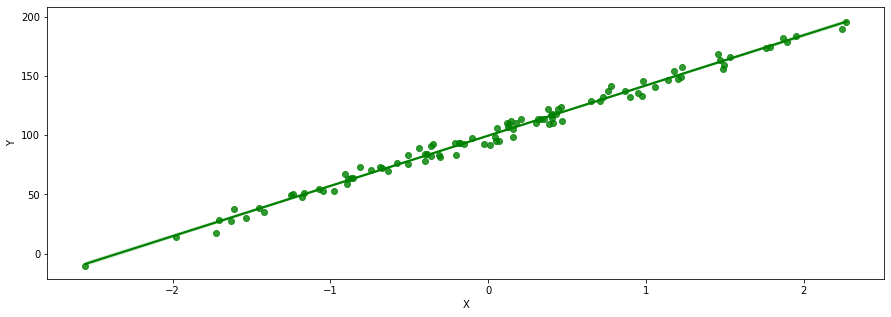

In [247]:
fig,ax= plt.subplots(figsize=(15,5))
sns.regplot(x=X,y=Y,color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
lin=LinearRegression().fit(X,Y)

TASK 2

In [248]:
lf=np.quantile(X,[0.25])-(1.5*(np.quantile(X,[0.75])-np.quantile(X,[0.25])))
uf=np.quantile(X,[0.75])+(1.5*(np.quantile(X,[0.75])-np.quantile(X,[0.25])))
print(lf,uf)

[-2.71525773] [2.80847841]


In [249]:
X_test=list(-np.random.randint(np.sqrt(lf*lf)*100,(np.sqrt(lf*lf)+3)*100,5)/100)+list(np.random.randint(uf*100,(uf+3)*100,5)/100)

In [251]:
X_test

[-3.88, -3.23, -4.15, -3.61, -3.96, 3.97, 5.01, 4.97, 5.68, 3.88]

In [288]:
Y_test=[np.nan for x in range(10)]

In [289]:
Y_test

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [340]:
X_train=pd.DataFrame(X)
Y_train=pd.DataFrame(Y)
X_test=pd.DataFrame(X_test)

In [341]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
Predict=reg.predict(X_test)
Predict

array([[-65.14448385],
       [-37.53308508],
       [-76.61383411],
       [-53.67513359],
       [-68.54280985],
       [268.31625514],
       [312.49449317],
       [310.79533017],
       [340.95547344],
       [264.49313839]])

In [342]:
Actual=[x*reg.coef_+reg.intercept_ for x in X_test.iloc[:,0]]

In [343]:
Actual

[array([[-65.14448385]]),
 array([[-37.53308508]]),
 array([[-76.61383411]]),
 array([[-53.67513359]]),
 array([[-68.54280985]]),
 array([[268.31625514]]),
 array([[312.49449317]]),
 array([[310.79533017]]),
 array([[340.95547344]]),
 array([[264.49313839]])]

In [344]:
Yhat=Y_train.append(pd.DataFrame(Predict)).reset_index().iloc[:,1]

In [345]:
Yhat

0       82.873740
1      133.373112
2      114.854830
3       72.783803
4       63.142196
          ...    
105    268.316255
106    312.494493
107    310.795330
108    340.955473
109    264.493138
Name: 0, Length: 110, dtype: float64

In [346]:
Xn=X_train.append(X_test).reset_index().iloc[:,1]

In [347]:
Xn

0     -0.359553
1      0.976639
2      0.402342
3     -0.813146
4     -0.887786
         ...   
105    3.970000
106    5.010000
107    4.970000
108    5.680000
109    3.880000
Name: 0, Length: 110, dtype: float64

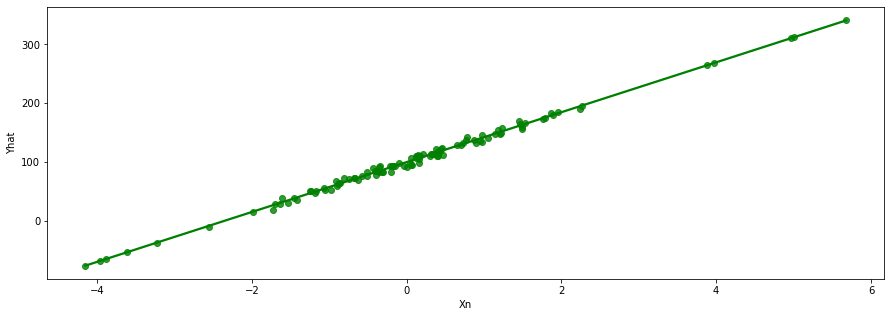

In [349]:
fig,ax= plt.subplots(figsize=(15,5))
sns.regplot(x=Xn,y=Yhat,color='g')
plt.xlabel('Xn')
plt.ylabel('Yhat')
plt.show()


TASK 3

In [376]:
df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [377]:
df.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

In [443]:
df1=df.drop(['state', 'county', 'community', 'communityname', 'fold'],axis=1)
df1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [444]:
df1.dropna(inplace=True)

In [445]:
df1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13,0.34
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1.00,0.07,0.15,1,0.35,0.73,0,0.31,0.21,0.69
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35,0.75
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0,0.62,0.15,0.07
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [461]:
from sklearn.model_selection import train_test_split
X_data=df1.iloc[:,:-1]
Y_data=df1.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.3,random_state=1)

In [462]:
X_data

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.22,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26
20,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.36,0.09,0.46,0.05,0.09,0.05,0.88,0.5,0.76,0.13
21,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,1,1.00,0.07,0.15,1,0.35,0.73,0,0.31,0.21
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.29,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.16,0.13,1.00,1.00,0.53,0.62,0.64,0.5,0.64,0.35
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.25,0.09,0.13,0.17,0.02,0.01,0.72,0,0.62,0.15
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


In [463]:
Y_data

0       0.20
16      0.49
20      0.34
21      0.69
23      0.63
        ... 
1969    0.75
1981    0.07
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 319, dtype: float64

In [464]:
reg.fit(X_train,Y_train)

LinearRegression()

In [465]:
Prediction=reg.predict(X_test)
Prediction

array([ 1.21931474,  0.771266  ,  0.54462533,  0.44543703,  0.24733468,
        0.72273292,  0.16680649,  0.16558941,  0.11165217,  0.2687862 ,
        0.35319471,  0.21222369, -0.07338987,  0.64009618,  0.82323023,
        0.61138163,  0.43474799, -0.05398641,  0.48518578,  0.75316212,
        0.25807521,  0.05938036,  0.54720918,  0.25733682,  0.25866972,
        0.2298325 ,  0.26943666,  0.40152271,  0.05283034,  0.49161698,
        0.2814328 ,  0.01372278,  0.20474946,  0.65860895,  0.01081104,
        0.43955839,  0.04361468,  0.02009565,  0.69810182,  0.29212343,
        0.75450966,  0.7436671 ,  0.5216488 ,  0.31274492,  0.71943736,
        0.58173274,  0.30569147,  0.86284794,  0.56028261,  0.3303681 ,
        0.67655013,  0.70223619,  0.32095484,  0.38273827,  0.35338248,
        0.49276054,  0.30146001,  0.22132609,  0.03866758,  0.61459607,
        0.42393492,  0.5499259 ,  0.46255662,  0.23022404,  0.61204648,
        0.35785725,  0.23836009,  0.15186744,  0.53520565,  0.59

In [466]:
df1_corr=df1.corr()

In [467]:
correlation=df1_corr.iloc[:,-1]

In [468]:
correlation

population             0.315215
householdsize          0.062975
racepctblack           0.658591
racePctWhite          -0.698964
racePctAsian          -0.074801
                         ...   
LandArea               0.162190
PopDens                0.232540
PctUsePubTrans         0.237468
LemasPctOfficDrugUn    0.033979
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, Length: 100, dtype: float64

In [469]:
np.quantile(correlation,[0.1,0.9])

array([-0.41149748,  0.52364351])

In [470]:
ind=[]
for c in range(len(correlation)):
    if correlation[c] < np.quantile(correlation,[0.1]) or correlation[c] > np.quantile(correlation,[0.9]):
        ind.append(c)

In [471]:
ind

[2, 3, 12, 15, 17, 19, 27, 31, 39, 40, 42, 43, 44, 45, 49, 66, 72, 73, 76, 99]

In [472]:
correlation[ind]

racepctblack           0.658591
racePctWhite          -0.698964
medIncome             -0.525707
pctWInvInc            -0.615921
pctWPubAsst            0.581427
medFamInc             -0.526517
PctPopUnderPov         0.615753
PctUnemployed          0.548039
FemalePctDiv           0.538270
TotalPctDiv            0.546010
PctFam2Par            -0.741250
PctKids2Par           -0.758904
PctYoungKids2Par      -0.696151
PctTeen2Par           -0.700793
PctIlleg               0.729064
PctPersOwnOccup       -0.462082
PctHousOwnOcc         -0.418514
PctVacantBoarded       0.535983
PctHousNoPhone         0.534196
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, dtype: float64

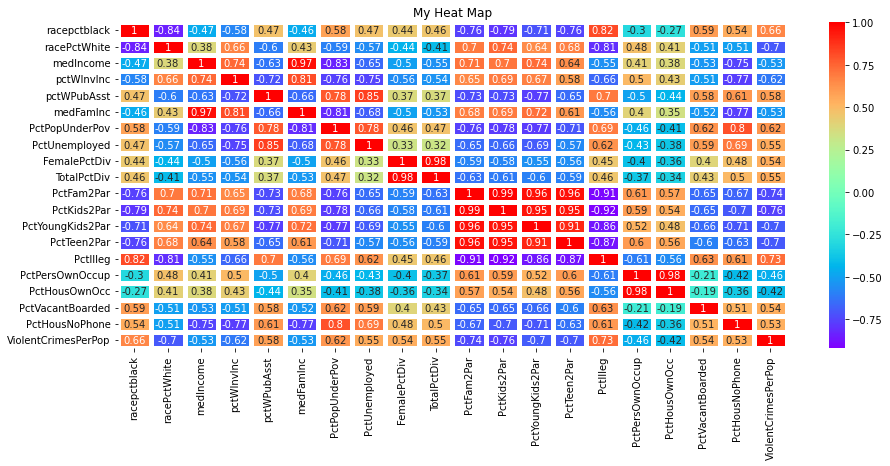

In [473]:
fig, ax=plt.subplots(figsize= (15,6))
sns.heatmap(df1[correlation[ind].index].corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()

TASK 4

In [474]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Prediction,Y_test))

0.22330126337961892

In [475]:
reg.score(X_data,Y_data)

0.7089265707595187

In [477]:
reg.score(X_train,Y_train)

0.8752096141514376

In [481]:
reg.score(X_test,Y_test)

0.19704456295409278

In [483]:
reg.score(X_test,Prediction)

1.0

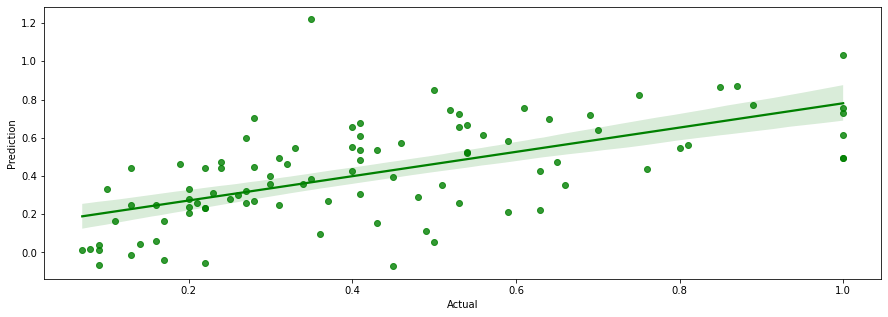

In [478]:
fig,ax= plt.subplots(figsize=(15,5))
sns.regplot(x=Y_test,y=Prediction,color='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()